In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Нажмите на кнопку чтобы увидеть код"></form>''')

## Графический метод решения задачи линейного программирования

### Теоретические основы графического метода решения задач линейного программирования

&#8195;&#8195;Наиболее простым и наглядным методом решения задач линейного программирования является графический метод. Он применяется для задач линейного программирования с двумя переменными, когда ограничения выражены неравенствами, и задач со многими переменными при условии, что в их канонической записи содержится не более двух свободных переменных.

&#8195;&#8195;Графический метод основан на геометрическом представлении допустимых решений и целевой функции задачи. Каждое из неравенств задачи линейного программирования определяет на координатной плоскости ($x_1$, $x_2$) некоторую полуплоскость. Пересечение этих полуплоскостей задает область допустимых решений (ОДР), то есть любая точка из этой области является решением системы ограничений.

&#8195;&#8195;В общем случае область допустимых решений может быть представлена одной из следующих фигур: выпуклым многоугольником, неограниченной многоугольной областью, лучом, отрезком, точкой или пустой областью. В последнем случае говорят, что ограничения не совместны.

#### Теперь вы можете перейти к заполнению данных для метода

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ipywidgets as widgets

from matplotlib.animation import FuncAnimation
from ipywidgets import interactive
from IPython.display import HTML
from numpy import linalg as LA
from scipy.optimize import linprog

%matplotlib notebook

In [3]:
print('Введите количество ограничений:', sep='\n\n')
print('')


n = int(input())
x = np.linspace(-10, 50, 100)

constr = np.zeros((n,3), dtype=int)
right_side = np.zeros((n,1), dtype = int)
points = np.zeros((n,4), dtype=float)

signs = []
count = 0
print('')
print('Введите тип уравнения(max/min?)', sep='\n\n')
print('')
extr = str(input())
print('')

print('Введите коеффициенты целевой функции через пробел:', sep='\n\n')
print('')
cel = np.array(input().split()).astype(int)

for i in range(n):
    count+=1
    print('')
    print("Введите коеффициенты " + str(count) + " неравенства через пробел:", sep='\n\n')
    print('')
    constr[i]=input().split()
    print('')
    print("Введите знак " + str(count) + " неравенства:", sep='\n\n')
    print('')
    signs.append(str(input()))

Введите количество ограничений:

3

Введите тип уравнения(max/min?)

min

Введите коеффициенты целевой функции через пробел:

1 2

Введите коеффициенты 1 неравенства через пробел:

5 -2 7

Введите знак 1 неравенства:

<=

Введите коеффициенты 2 неравенства через пробел:

-1 2 5

Введите знак 2 неравенства:

<=

Введите коеффициенты 3 неравенства через пробел:

1 1 6

Введите знак 3 неравенства:

>=


### Алгоритм решения ЗЛП графическим способом

#### Шаг №1. Строим ограничения ЗЛП

&#8195;&#8195;Построим область допустимых решений, т.е. решим графически систему неравенств. Для этого построим каждую прямую и определим полуплоскости, заданные неравенствами.
Построим первое уравнение по двум точкам. Для нахождения первой точки приравниваем $x_1$ = 0. Для нахождения второй точки приравниваем $x_2$ = 0. Далее необходимо наносим прямую, которая у нас получилась, на координатную плоскость. Определим полуплоскость, задаваемую неравенством. Выбрав точку (0; 0), определим знак неравенства в полуплоскости. Подставим эту точку в неравенство и узнаем, в какой полуплоскости лежит прямая. Те же самые действия необходимо проделать с оставшимися неравенствами в системе.

&#8195;&#8195; На этом же графике сразу отметим точки пересечения функций, функций с осями координат. В будущем они могут нам пригодится.

&#8195;&#8195; В результате первого шага получается следующая система координат:

In [4]:
######    ФУНКЦИИ     #######

def calc_points_3():
    
    m1 = np.array([[constr[0][0],constr[0][1]], [constr[1][0], constr[1][1]]])
    v1 = np.array([constr[0][2],constr[1][2]])

    m2 = np.array([[constr[0][0],constr[0][1]], [constr[2][0], constr[2][1]]])
    v2 = np.array([constr[0][2],constr[2][2]])

    m3 = np.array([[constr[1][0],constr[1][1]], [constr[2][0], constr[2][1]]])
    v3 = np.array([constr[1][2],constr[2][2]])

    f_line = np.linalg.solve(m1,v1)
    s_line = np.linalg.solve(m2,v2)
    th_line = np.linalg.solve(m3,v3)

    c = np.concatenate((f_line,s_line, th_line), axis=0)
    cross_points = c.reshape(-1, 2)
    
    return cross_points

def calc_points_2():
    
    m1 = np.array([[constr[0][0],constr[0][1]], [constr[1][0], constr[1][1]]])
    v1 = np.array([constr[0][2],constr[1][2]])

    f_line = np.linalg.solve(m1,v1)
    cross_points = f_line.reshape(-1, 2)
    extremum_points[i] = cel[0]*cross_points[0][0] + cel[1]*cross_points[0][1]
    
    return cross_points

def draw_crossp():
    
    for i in range(n):
        ax.plot(points[i][0],  marker='o', color='red')

def drawing_zone():
    
    def frange(start, stop, step):
        i = start
        while i < stop:
            yield i
            i += step


    true_points = []
    temp_mark = []

    for i in frange(0,8,0.05):
        for j in frange(0,8,0.05):
            for k in range(n):
                
                if (signs[k] == '<='):
                    
                    if (i * constr[k][0] +  j * constr[k][1] < constr[k][2]):
                        temp_mark.append(True)
                    else:
                        temp_mark.append(False)
                        
                if (signs[k] == '>='):
                    
                    if (i * constr[k][0] +  j * constr[k][1] > constr[k][2]):
                        temp_mark.append(True)
                    else:
                        temp_mark.append(False)


            if (np.isin(temp_mark, True).all()):
                true_points.extend([i,j])
                temp_mark.clear()
            
            temp_mark.clear()
                
    t_p = np.reshape(true_points, (-1, 2))    # Закрашиваемая область точек
    t_p1 = t_p[:,0]                           # Разделение на два массива точек
    t_p2 = t_p[:,1]
    ax.scatter(t_p1, t_p2, s = 5, alpha=0.2, marker='s', color = 'gold')
    
def print_lines():
    
    for i in range(n):
        y = (-constr[i][0]*x + constr[i][2])/constr[i][1]
        ax.plot(x, y, color="black")

def print_points(points):
    
    for i in range(n):
        ax.plot(points[i][0], 0.0, 0.0, points[i][3], marker='o', color='darkviolet')

def function_points():
    
    for i in range(n):
        res = float(constr[i][2]/constr[i][0]) #приравниваем к нулю Y
        res1 = float(constr[i][2]/constr[i][1]) #приравниваем к нулю X
        points[i][0] = res
        points[i][3] = res1
    
    return points
    
def gradient():
    
    ax.plot([0,cel[0]],[0,cel[1]], color = 'darkviolet')
    ax.plot([0,cel[0]],[0,cel[1]], marker = 'o', color = 'darkviolet')
    

def convert_matrix(matrix):
    
    new_constr = matrix
    
    for i in range(n):
        if (signs[i] == '>='):
            new_constr[i] = -matrix[i]
    
    return new_constr

def extremum_points_mins(A,b):
    
    c = [cel[0], cel[1]]
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
    
    return res

def extremum_points_maxs(A,b):
    
    c = [-cel[0], -cel[1]]
    x0_bounds = (0, None)
    x1_bounds = (0, None)

    res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])
    
    return res

def system(ax):
    
    ax.set_xlim(-1, 7)
    ax.set_ylim(-1, 7)
    ax.set_xlabel("Ось X")                              
    ax.set_ylabel("Ось Y")

    ax.tick_params(axis = 'y',    
                   which = 'major',   
                   direction = 'inout',    
                   length = 9,    
                   width = 1.5,     
                   color = 'black',    pad = 7,    
                   labelsize = 10,    
                   labelcolor = 'maroon',    
                   bottom = True,    
                   top = False,    
                   left = True,    
                   right = False,    
                   labelbottom = True,    
                   labeltop = True,    
                   labelleft = True,    
                   labelright = False,    
                   labelrotation = 0)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.grid(True)

    colors = ['yellow','blue','black']

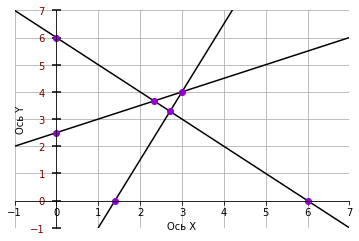

In [5]:
p_temp = function_points()
fig = plt.figure('Построение ограничений')
ax = plt.subplot()

system(ax)
print_lines()
print_points(p_temp)

if (n == 3):
    cross_p = calc_points_3()
    
if (n == 2):
    cross_p = calc_points_2()
    
for i in range(n):
    ax.plot(cross_p[i][0],cross_p[i][1],  marker='o', color='darkviolet')
plt.show()

#### Шаг №2. Определить вектор-градиент
Формируем графическое изображение целевой функции.
    
&#8195;&#8195;Приравняем целевую функцию к постоянной величине L: L=${c_1x_1+c_2x_2}$. Это уравнение при фиксированном значении L определяет прямую, а при изменении L семейство параллельных прямых, каждая из которых называется линией уровня. 

&#8195;&#8195;Далее определяем направление возрастания целевой функции (вектор ${\overline{C}}$).Для определения направления максимального возрастания значения целевой функции строим вектор-градиент целевой функции, который начинается в точке (0,0), заканчивается в точке (${c_1x_1,c_2x_2}$). Если линия уровня и вектор-градиент построены верно, то они будут перпендикулярны.

&#8195;&#8195; На рисунке ниже вектор-градиент выделен фиолетовым цветом.

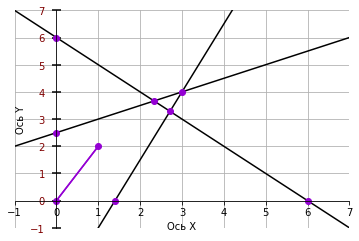

In [6]:
p_temp = function_points()
fig = plt.figure("Отрисовка вектора-градиента")
ax = plt.subplot()

system(ax)
print_lines()
print_points(p_temp)

if (n == 3):
    cross_p = calc_points_3()
    
if (n == 2):
    cross_p = calc_points_2()
    
for i in range(n):
    ax.plot(cross_p[i][0],cross_p[i][1],  marker='o', color='darkviolet')
gradient()    
plt.show()

#### Шаг №3. Штриховка отсеченной полуплоскости

&#8195;&#8195; На данном этапе необходимо определить, в какой полуплоскости лежит каждое неравенство из системы ограничений. Если вы не знаете как это сделать, вы можете обратиться за сведениями в методические указания.

&#8195;&#8195; Выделяем графически ту область, которая была отсечена построенными функциями, это та область допустимых значений, в которой необходимо найти максимум или минимум, в зависимости от задания.


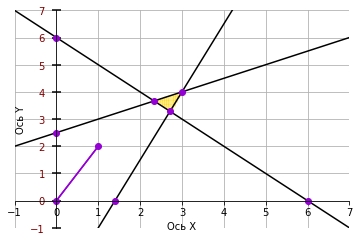

In [7]:
p_temp = function_points()
fig = plt.figure("Штриховка отсеченной области")
ax = plt.subplot()

system(ax)
print_lines()
print_points(p_temp)

if (n == 3):
    cross_p = calc_points_3()
    
if (n == 2):
    cross_p = calc_points_2()
    
for i in range(n):
    ax.plot(cross_p[i][0],cross_p[i][1],  marker='o', color='darkviolet')
gradient()
drawing_zone()
plt.show()

#### Шаг №4. Смещение линии уровня.
Находим оптимальное решение задачи ЛП.
    
&#8195;&#8195; Линию уровня перемещаем по направлению вектора ${\overline{C}}$ для задач на максимум и в направлении, противоположном ${\overline{C}}$, для задач на минимум. Перемещение линии уровня производится до тех пор, пока у нее окажется только одна общая точка с областью допустимых решений (ОДР). Эта точка определяет единственное решение задачи ЛП и будет точкой экстремума.

&#8195;&#8195; Если окажется, что линия уровня параллельна одной из сторон ОДР, то задача ЛП будет иметь бесчисленное множество решений. Если ОДР представляет неограниченную область, то целевая функция может быть неограниченна. Задача ЛП может быть неразрешима, когда определяющие ее ограничения окажутся противоречивыми.

&#8195;&#8195; Если вы хотите остановить анимацию линии уровня, нажмите на синию кнопку в верхнем правом углу графика.

<IPython.core.display.Javascript object>


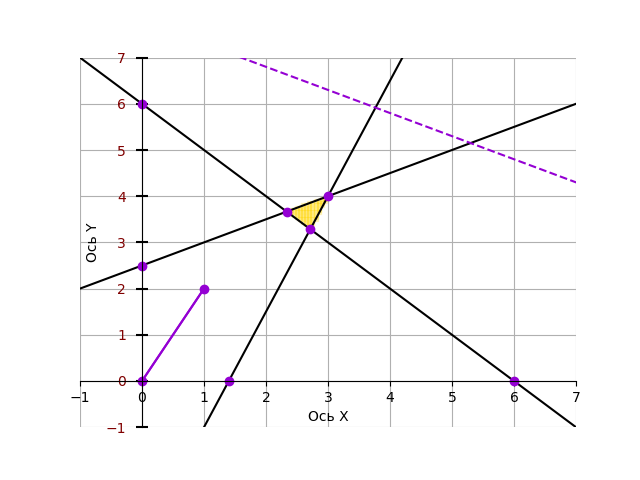

In [8]:
%matplotlib notebook
p_temp = function_points()
fig = plt.figure("Движение линии уровня")
ax = plt.subplot()

system(ax)
print_lines()
print_points(p_temp)

if (n == 3):
    cross_p = calc_points_3()
    
if (n == 2):
    cross_p = calc_points_2()
    
for i in range(n):
    ax.plot(cross_p[i][0],cross_p[i][1],  marker='o', color='darkviolet')
gradient()
drawing_zone()
plt.show()

y = (-cel[0]*x + i)/cel[1]
    
p_line, = ax.plot(x,y, linestyle = '--', color = 'darkviolet')

def animate(i):
    y = (-cel[0]*x + i*0.3)/cel[1]
    p_line.set_data(x,y)
    
    return p_line,

anima = FuncAnimation(fig, animate, frames=100, interval=50,blit = True)

#### Шаг №5. Поиск экстремальной точки

Находим координаты точки экстремума и значение целевой функции в этой точке.
    
&#8195;&#8195; Если мы ищем минимум функции, то необходимо взять первую точку входа линии уровня в отсеченную область (на рисунке отмечена желтым цветом). А если максимум, то последню точку вхождения линиии уровня в область.

&#8195;&#8195; Для вычисления координат оптимальной точки решим систему уравнений прямых, на пересечении которых находится эта точка. Подставляя найденный результат в целевую функцию, получим искомое оптимальное значение целевой функции.

#### Итоговый ответ.

&#8195;&#8195; В результате всех вычислений мы получили следующий ответ:

In [9]:
temp_matrix = convert_matrix(constr)
extr1 = np.delete(temp_matrix, 2, axis = 1)
extr2 = constr[:,2]

if (extr == "max"):
    m_p = extremum_points_maxs(extr1,extr2)
    if (m_p['success'] == True):
        points_e = m_p['x']
        function_max = cel[0]*points_e[0] + cel[1]*points_e[1]
        print("Экстремальная точка: " + str(m_p['x']))
        print("Значение функции: " + str(function_max))
    else:
        print("Функция не ограничена")
    
elif (extr == "min"):
    m_p = extremum_points_mins(extr1,extr2)
    if (m_p['success'] == True):
        points_e = m_p['x']
        function_min = cel[0]*points_e[0] + cel[1]*points_e[1]
        print("Экстремальная точка: " + str(m_p['x']))
        print("Значение функции: " + str(function_min))
    
else:
    print("Ошибка, вы ввели некорректное значение")

Экстремальная точка: [2.71428571 3.28571429]
Значение функции: 9.285714285709638
